## Demo 1: Explore and Preprocess Raster data

- Explore raster data
  - Read raster data
  - Visualize raster data
  - Raster object properties and methods
- Data preprocessing
  - Clip, resample
  - Save raster data
  - Batch processing raster 

### Import relevant modules

In [10]:
import arcpy
from arcpy.sa import *
from arcpy.ia import *

### Set environment workspace

In [11]:
arcpy.env.workspace = r'C:\DevSummit20\PythonRaster\Data\SuitabilityModeling\Data.gdb'

### Reading a raster dataset

In [12]:
elev = Raster(r'Elevation')

### Visualize raster data

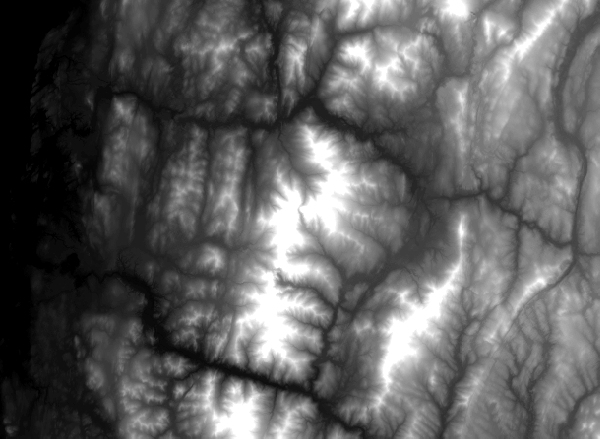

In [13]:
elev

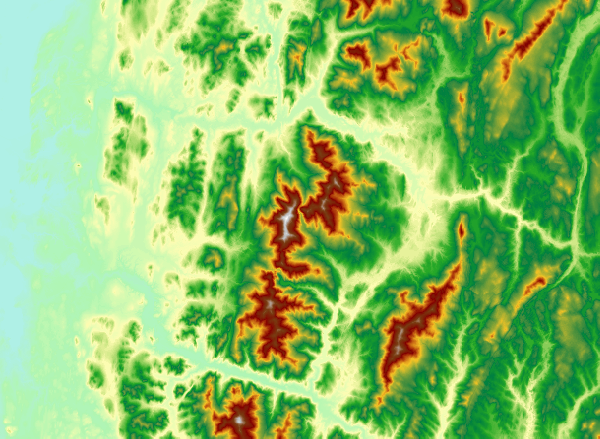

In [14]:
Render(elev, colormap='Elevation #1')

### Raster object properties and methods

In [15]:
elev.minimum
# elev.mean
# elev.catalogPath
# print('The raster has {} band(s)'.format(elev.bandCount))
# print('The size of the raster is {} x {}'.format(elev.height, elev.width))
# print('The cell size of the raster is {} x {}'.format(elev.meanCellWidth, elev.meanCellHeight))

69.0

In [16]:
elev_rasterInfo = elev.getRasterInfo()

In [17]:
print(elev_rasterInfo.toJSONString())
# import json
# print(json.dumps(json.loads(elev_rasterInfo.toJSONString()), indent=2))

{"extent":{"xmin":439952.11376234499,"ymin":200181.28469451156,"xmax":513122.11376234499,"ymax":253671.28469451156,"spatialReference":{"wkt":"PROJCS[\"NAD_1983_StatePlane_Vermont_FIPS_4400\",GEOGCS[\"GCS_North_American_1983\",DATUM[\"D_North_American_1983\",SPHEROID[\"GRS_1980\",6378137.0,298.257222101]],PRIMEM[\"Greenwich\",0.0],UNIT[\"Degree\",0.0174532925199433]],PROJECTION[\"Transverse_Mercator\"],PARAMETER[\"False_Easting\",500000.0],PARAMETER[\"False_Northing\",0.0],PARAMETER[\"Central_Meridian\",-72.5],PARAMETER[\"Scale_Factor\",0.9999642857142857],PARAMETER[\"Latitude_Of_Origin\",42.5],UNIT[\"Meter\",1.0]],VERTCS[\"Unknown VCS\",VDATUM[\"Unknown\"],PARAMETER[\"Vertical_Shift\",0.0],PARAMETER[\"Direction\",1.0],UNIT[\"Foot_US\",0.3048006096012192]]"}},"geodataXform":{"spatialReference":{"wkt":"PROJCS[\"NAD_1983_StatePlane_Vermont_FIPS_4400\",GEOGCS[\"GCS_North_American_1983\",DATUM[\"D_North_American_1983\",SPHEROID[\"GRS_1980\",6378137.0,298.257222101]],PRIMEM[\"Greenwich\",0.0

### Data preprocessing

In [18]:
elev_clip = Clip(elev, r'StudyArea')

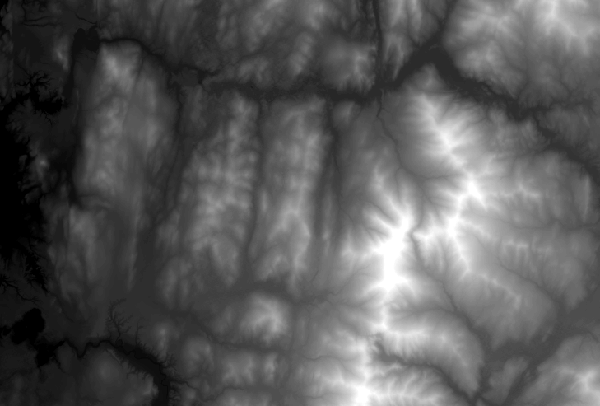

In [19]:
elev_clip

In [20]:
elev_final = Resample(elev_clip, "Bilinear", 30, 100)

In [21]:
print('New cell size is {} x {}'.format(elev_final.meanCellWidth, elev_final.meanCellHeight))

New cell size is 100.0 x 100.0


### Saving a temporary raster

In [22]:
elev_final.save(r'Elevation_final')

### List raster datasets in a workspace to batch process

In [23]:
arcpy.env.workspace = r'C:\DevSummit20\PythonRaster\Data\SuitabilityModeling\Input'

In [27]:
rasters = arcpy.ListRasters('*', 'GRID')

In [28]:
rasters

['elevation', 'landuse']

In [29]:
for raster in rasters:
    raster_clip = Clip(raster, r'StudyArea')
    raster_final = Resample(raster_clip, "Bilinear", 30, 100)
    raster_final.save(raster + '_f')